In [1]:
pip install --upgrade openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import openpyxl
print(openpyxl.__version__)

3.1.5


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

C:\Users\dell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [9]:
df = pd.read_csv("EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
# Handle missing values (if any)
df.dropna(inplace=True)


In [11]:
# Removing outliers
# For simplicity, we use Z-score method to identify outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_clean = df[(z_scores < 3).all(axis=1)]


In [12]:
# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean.select_dtypes(include=[np.number]))

# 2. Exploratory Data Analysis (EDA)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

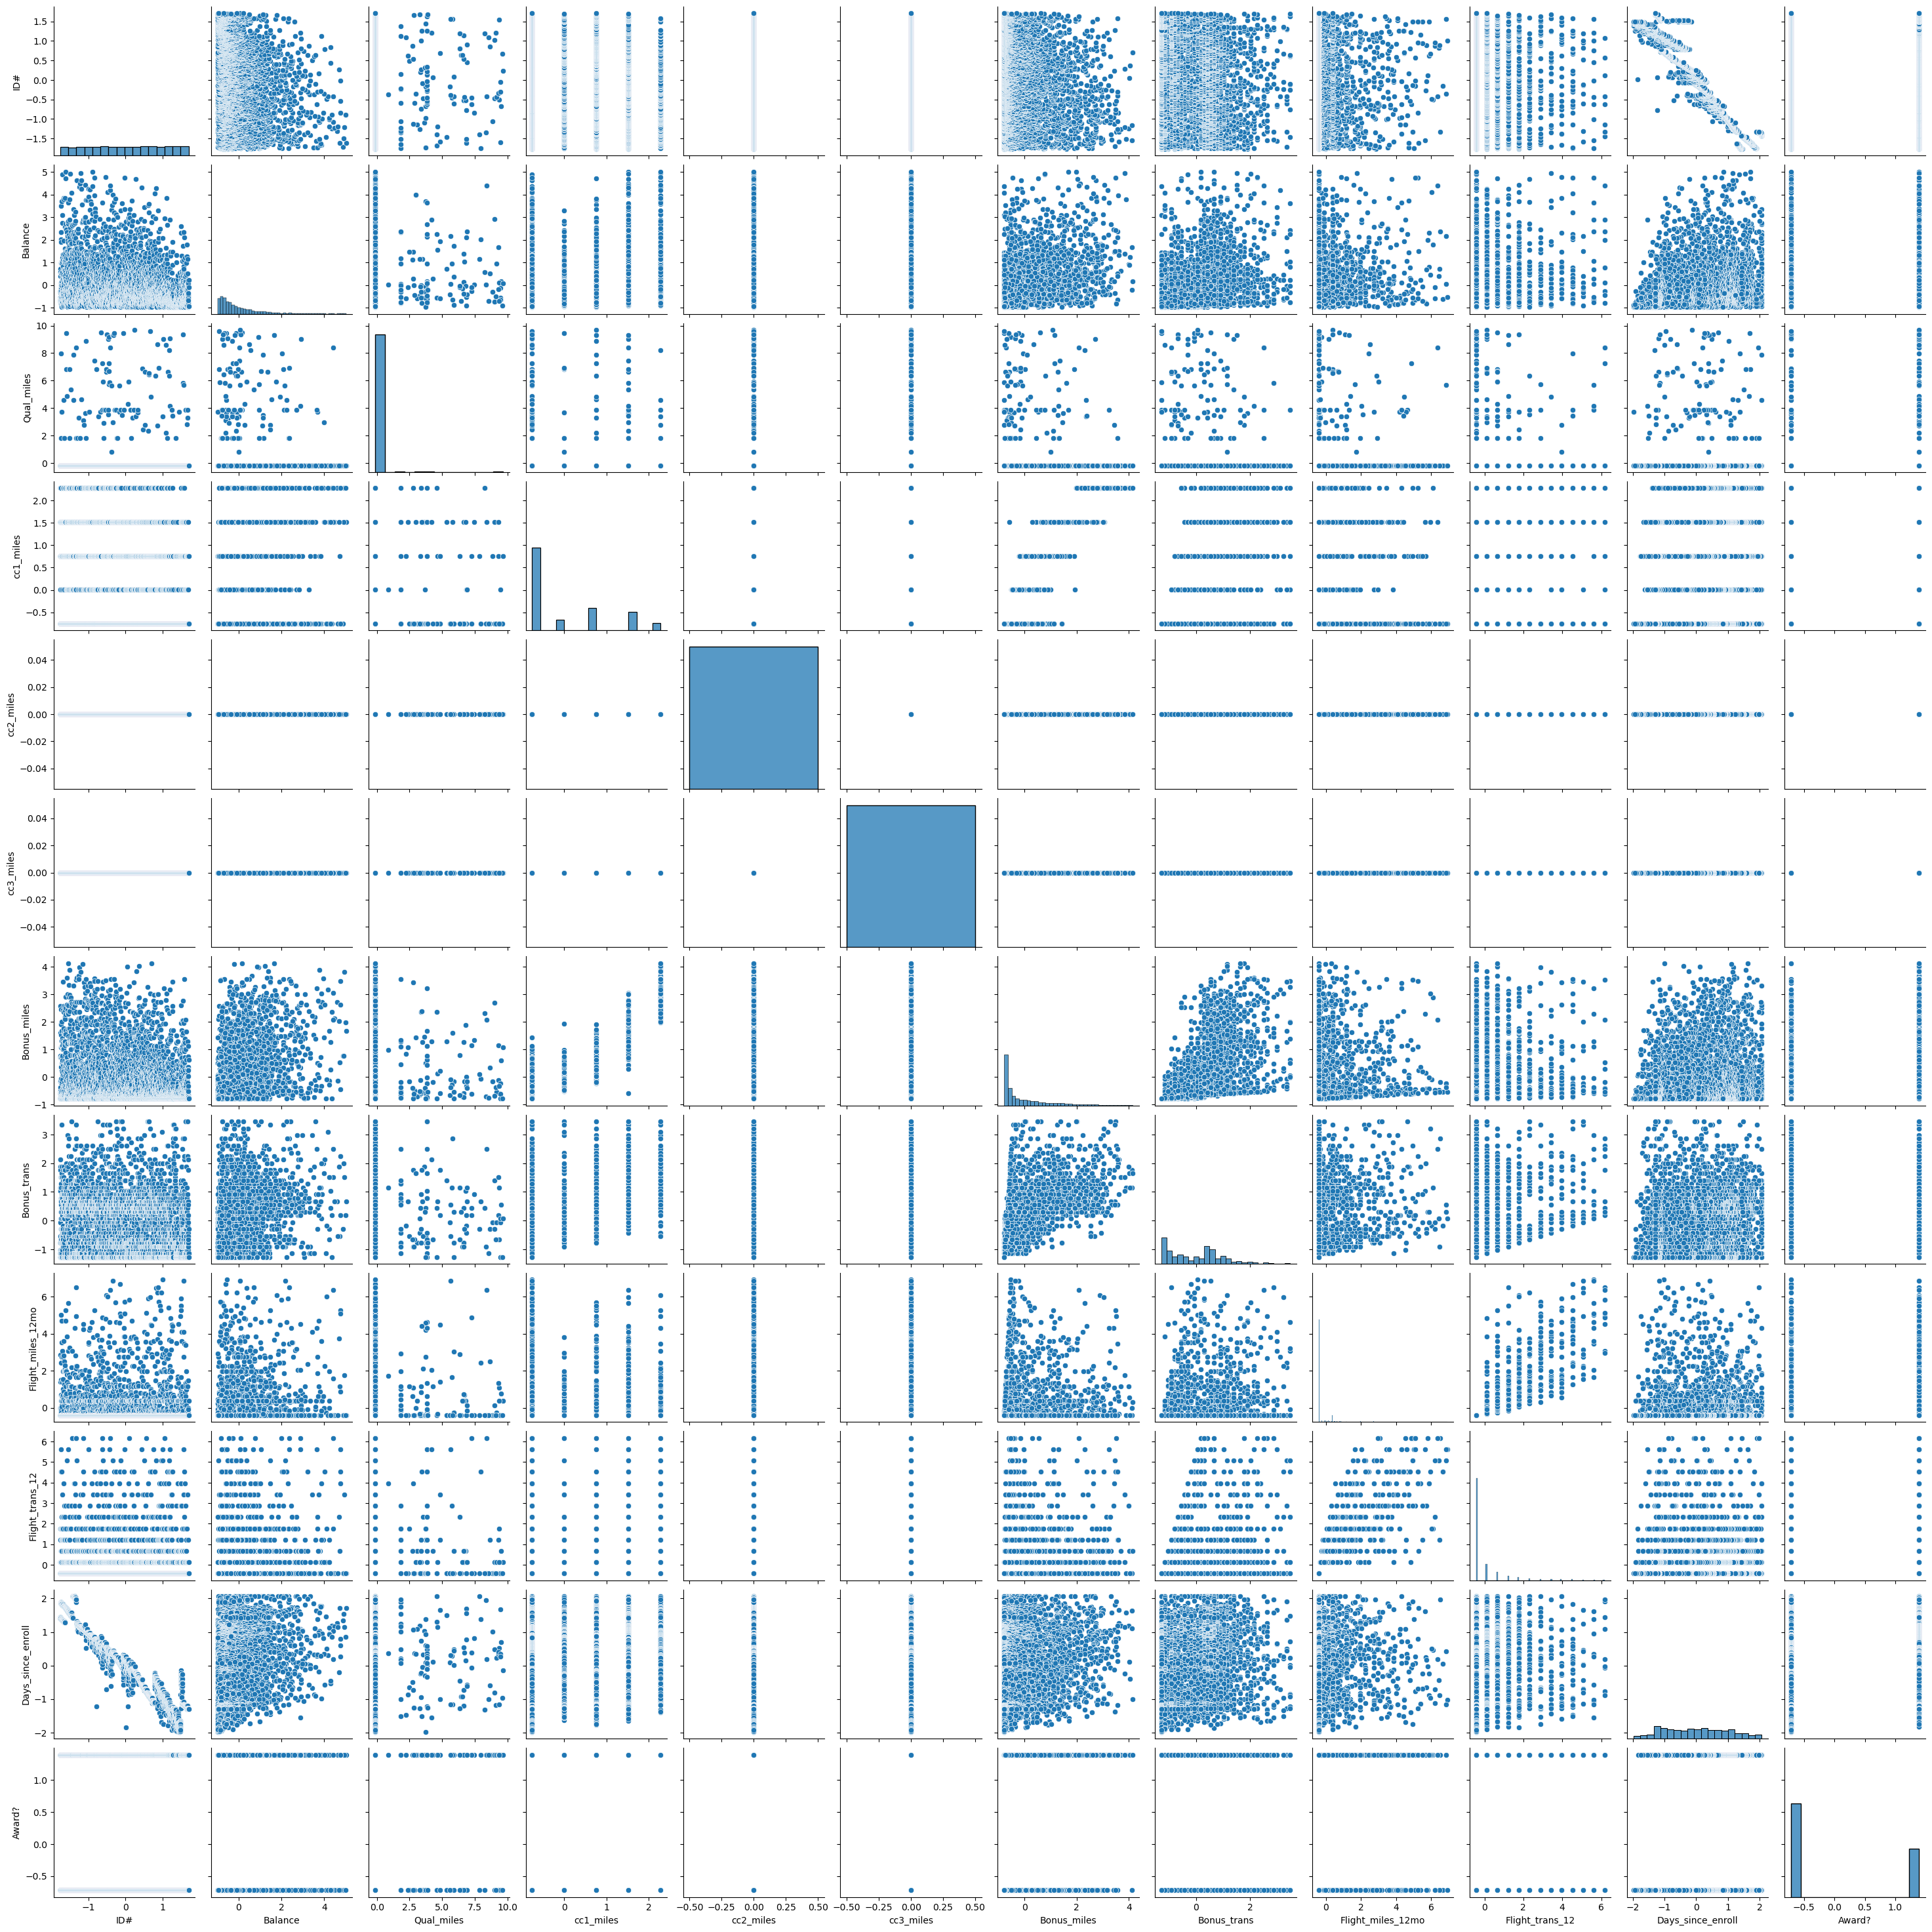

In [14]:
# Example of visualizing pairplot for some features
sns.pairplot(pd.DataFrame(df_scaled, columns=df_clean.select_dtypes(include=[np.number]).columns))
plt.show()


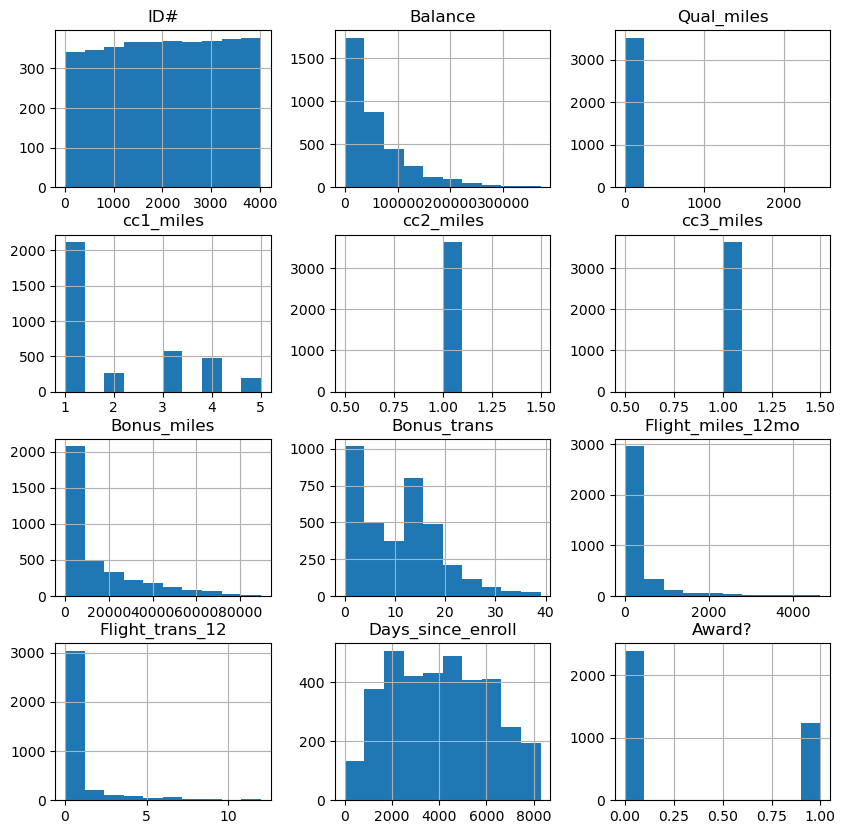

In [15]:
# Plotting histograms
df_clean.hist(figsize=(10, 10))
plt.show()

# 3. Clustering Algorithms
We will implement K-Means, Hierarchical, and DBSCAN clustering algorithms.

# K-Means Clustering

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [17]:
# Determine optimal K using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


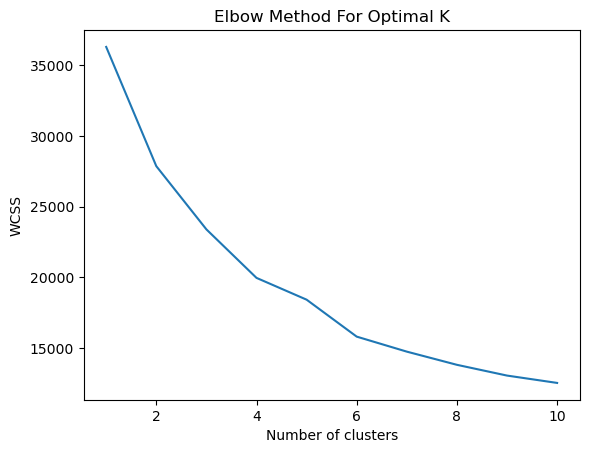

In [18]:
# Plot Elbow Curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
# Apply K-Means with the chosen K (e.g., K=5)
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)
print(f"K-Means Silhouette Score: {silhouette_score(df_scaled, clusters_kmeans)}")

K-Means Silhouette Score: 0.23450547493240942


# Hierarchical Clustering

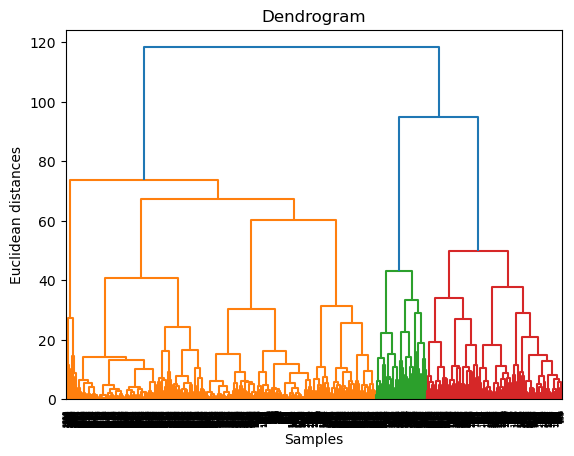

In [20]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Plot Dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [21]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters_hierarchical = hierarchical.fit_predict(df_scaled)


# DBSCAN Clustering

In [22]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(df_scaled)

# Evaluation (Note: DBSCAN does not always provide a silhouette score)
print(f"Number of clusters found by DBSCAN: {len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)}")

Number of clusters found by DBSCAN: 26


# 4. Cluster Analysis and Interpretation

In [28]:
# Adding cluster labels to the dataframe
df_clean['KMeans_Cluster'] = clusters_kmeans
df_clean['Hierarchical_Cluster'] = clusters_hierarchical
df_clean['DBSCAN_Cluster'] = clusters_dbscan


C:\Users\dell\AppData\Local\Temp\ipykernel_2848\794033200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['KMeans_Cluster'] = clusters_kmeans
C:\Users\dell\AppData\Local\Temp\ipykernel_2848\794033200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Hierarchical_Cluster'] = clusters_hierarchical
C:\Users\dell\AppData\Local\Temp\ipykernel_2848\794033200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [27]:
# Example: Analyzing K-Means clusters
print(df_clean.groupby('KMeans_Cluster').mean())

                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1077.635505   47108.092540   43.375826   1.252125        1.0   
1               3153.181984   31214.858963   21.229299   1.047316        1.0   
2                992.183246  122392.977312   31.244328   4.017452        1.0   
3               2006.208145   95643.199095  156.511312   1.981900        1.0   
4               2652.104720   65227.834808   32.351032   2.998525        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0   4438.652502     6.778093         118.110482   
1                     1.0   2629.062784     4.859873          86.787989   
2                     1.0  42455.966841    18.155323         202.872600   
3                     1.0  19006.330317    16.171946        2317

# 5. Visualization
Visualizing the clusters can help understand the separation of data points.

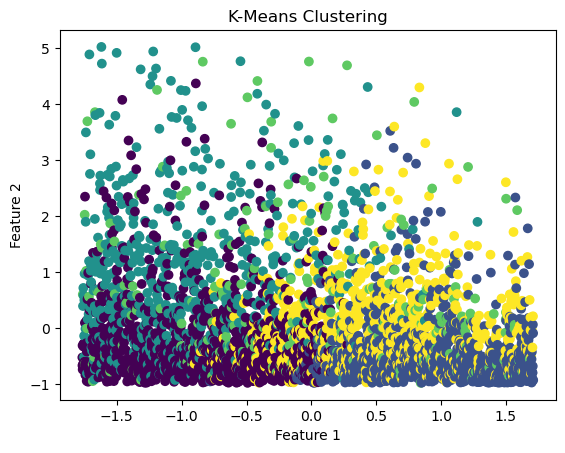

In [24]:
import matplotlib.pyplot as plt

# Scatter plot for K-Means Clustering
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

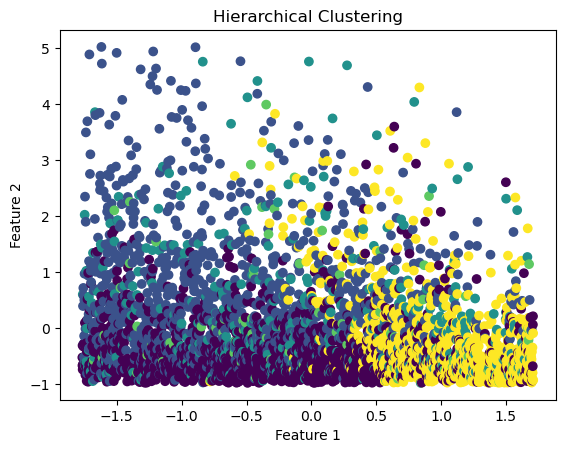

In [25]:
# Scatter plot for Hierarchical Clustering
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_hierarchical, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


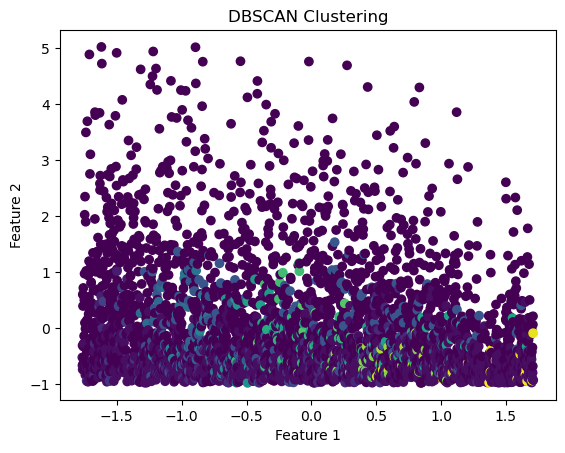

In [26]:
# Scatter plot for DBSCAN Clustering
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluation and Performance Metrics
We used silhouette score for K-Means, but note that DBSCAN may not always have a silhouette score, especially if it has too many outliers.

This code covers preprocessing, clustering, and visualization. Feel free to tweak the parameters based on your specific requirements or dataset characteristics.





